# 1D Convolutional Neural Network
#### Main Purpose:
Following program demonstrates the effect of applying different filters to a 1D data sequence using a convolution-like process. This kind of operation is used in signal processing, image processing, and data smoothing to extract or enhance specific features from data.

Here's a breakdown of the main purposes:

1. Generate Random Input Data:
   - The program generates a 20x1 array of random integers between 0 and 99. This array serves as the input data to which the filtering operations will be applied.
2. Apply Two Filters:
   - Two filters (filter1 and filter2) are applied to the input data using a sliding window technique.
   - **filter1**: A simple smoothing filter with values [1/2, 0, 1/2].
   - **filter2**: A simple averaging filter with values [1/3, 1/3, 1/3].
3. Perform Convolution-like Operation:
   - The filters are applied to the input data in a sliding window manner, where a window of the same size as the filter is taken from the input, and the dot product of the window and filter is computed. The result is then stored in output arrays.
4. Output the Results:
   - The results of applying filter1 and filter2 are stored in two output arrays (output_data1 and output_data2).

The program prints the original input data alongside the results of the filtered outputs.


input_data	output_data1	output_data2
----------	------------	------------
   51
   92		   32		   52
   14		   82		   59
   71		   37		   48
   60		   46		   50
   20		   71		   54
   82		   53		   63
   86		   78		   81
   74		   80		   78
   74		   80		   78
   87		   86		   87
   99		   55		   70
   23		   50		   41
    2		   22		   15
   21		   27		   25
   52		   11		   25
    1		   70		   47
   87		   15		   39
   29		   62		   51
   37


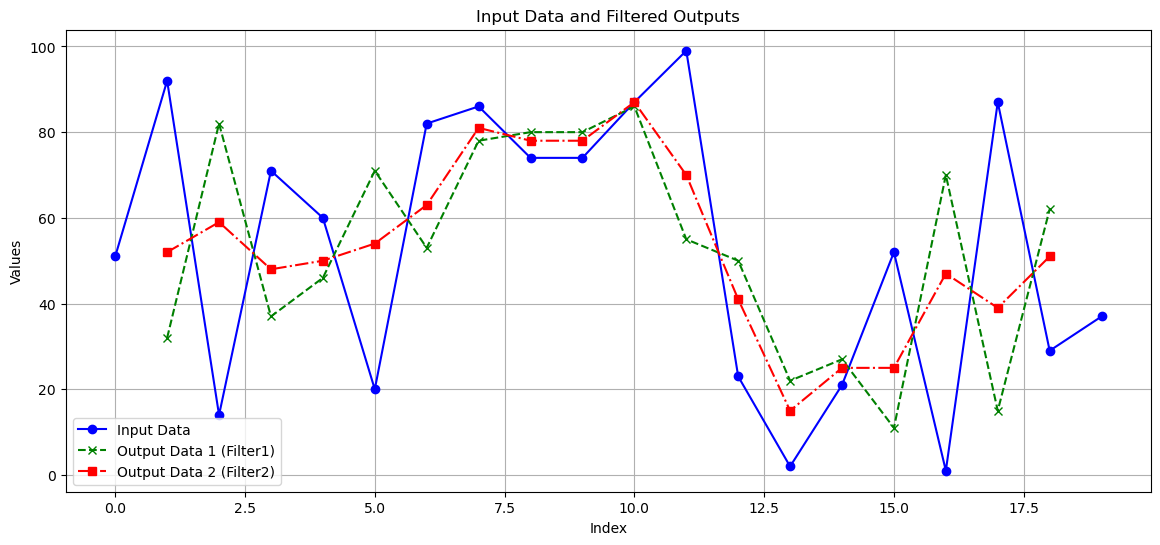

In [6]:
import numpy as np
import matplotlib.pyplot as plt  # Import for plotting

# Set a seed for reproducibility of the random numbers
np.random.seed(42)

# Generate a 20x1 array of random integers between 0 and 99 (inclusive)
input_data = np.random.randint(0, 100, (20, 1))

# Define two filters (kernels) for convolution-like operations
filter1 = np.array([1/2, 0, 1/2])  # Filter with values [1/2, 0, 1/2]
filter2 = np.array([1/3, 1/3, 1/3])  # Filter with values [1/3, 1/3, 1/3]

# Initialize two output arrays to store results, based on the length of the filters
output_data1 = np.zeros((len(input_data) - len(filter1) + 1, 1), dtype=int)  # For filter1 results
output_data2 = np.zeros((len(input_data) - len(filter1) + 1, 1), dtype=int)  # For filter2 results

# Perform convolution-like operations with sliding window using the filters
for i in range(len(input_data) - len(filter1) + 1):
    # Apply filter1 to a slice of input_data and round the result
    output_data1[i] = np.round(np.dot(input_data[i:i+len(filter1)].T, filter1))
    
    # Apply filter2 to a slice of input_data and round the result
    output_data2[i] = np.round(np.dot(input_data[i:i+len(filter2)].T, filter2))

# Print the headers for the output table
print("\ninput_data\toutput_data1\toutput_data2")
print("----------\t------------\t------------")

# Loop through the input data and corresponding output data
for i in range(len(input_data)):
    # For indices where filtered outputs exist, print both input and outputs
    if 0 < i < len(input_data) - 1:
        print(f"{input_data[i][0]:5d}\t\t{output_data1[i-1][0]:5d}\t\t{output_data2[i-1][0]:5d}")
    else:
        # For the first and last elements, only print input data (no output data available)
        print(f'{input_data[i][0]:5d}')

# Function to plot the input data and output data
def plot_data(input_data, output_data1, output_data2):
    plt.figure(figsize=(14, 6))
    
    # Plot input data
    plt.plot(input_data, label='Input Data', marker='o', linestyle='-', color='blue')
    
    # Plot output_data1 and output_data2, with appropriate offset to match input data indices
    plt.plot(range(1, len(output_data1)+1), output_data1, label='Output Data 1 (Filter1)', marker='x', linestyle='--', color='green')
    plt.plot(range(1, len(output_data2)+1), output_data2, label='Output Data 2 (Filter2)', marker='s', linestyle='-.', color='red')
    
    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Input Data and Filtered Outputs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plot function
plot_data(input_data, output_data1, output_data2)

## Using Tensorflow Keras to 